<a href="https://colab.research.google.com/github/BrajanNieto/Mlearning/blob/main/DBSCAN_Misterio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Tema :  Clustering
 ----
  
  University : UTEC \\
  Course       : Machine Learning \\
  Professor    : Cristian López Del Alamo \\
  Topic        : DBSCAN \\
  Termina      :
   

 ----

Write the names and surnames of the members and the percentage of participation of each one in the development of the practice:
 - Integrante 1: Lopez Medina Sebastían (100 %)
 - Integrante 2: Nieto Espinoza Brajan(100 %)
 - Integrante 3: Tapia Chasquibol Mateo(100 %)
  ----


**Note: You may use previous codes from other exercises to read images from the database or to display images.**


In [7]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle, islice

In [2]:
#Cargar Datos
url = "https://raw.githubusercontent.com/BrajanNieto/Mlearning/main/misterio.csv"
df = pd.read_csv(
    url,
    header=None,                       # No hay fila de encabezado en el CSV
    names=['X', 'Y', 'R', 'G', 'B']    # Nombres que quieres dar a cada columna
)
df.head()

,X,Y,R,G,B
0,48,48,253,253,253
1,48,49,254,254,254
2,48,51,0,0,0
3,48,52,252,252,252
4,48,160,254,254,254


In [3]:
#Describe
df.describe()

,X,Y,R,G,B
count,18106.000000,18106.000000,18106.000000,18106.000000,18106.000000
mean,195.152712,352.347896,142.454490,142.454490,142.454490
std,110.159537,205.170724,125.013586,125.013586,125.013586
min,48.000000,40.000000,0.000000,0.000000,0.000000
25%,99.000000,168.000000,0.000000,0.000000,0.000000
50%,158.000000,369.000000,251.000000,251.000000,251.000000
75%,302.000000,554.000000,253.000000,253.000000,253.000000
max,383.000000,743.000000,254.000000,254.000000,254.000000


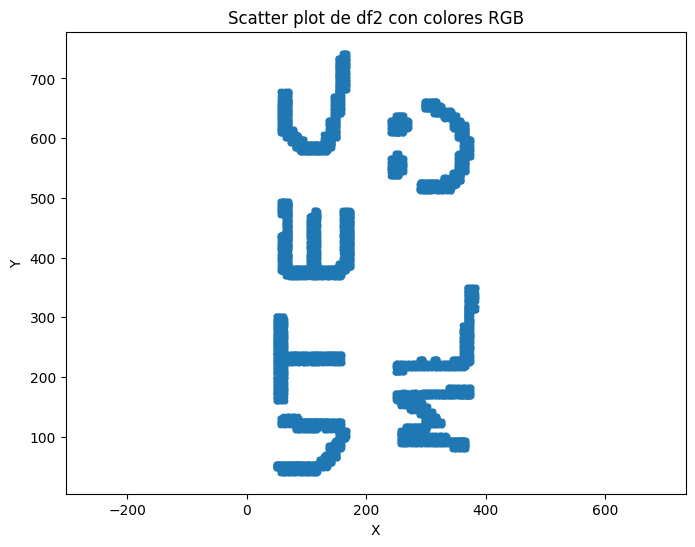

In [6]:
# Inspección VIsual
plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['Y'], s=10, marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot de df2 con colores RGB')
plt.axis('equal')
plt.show()

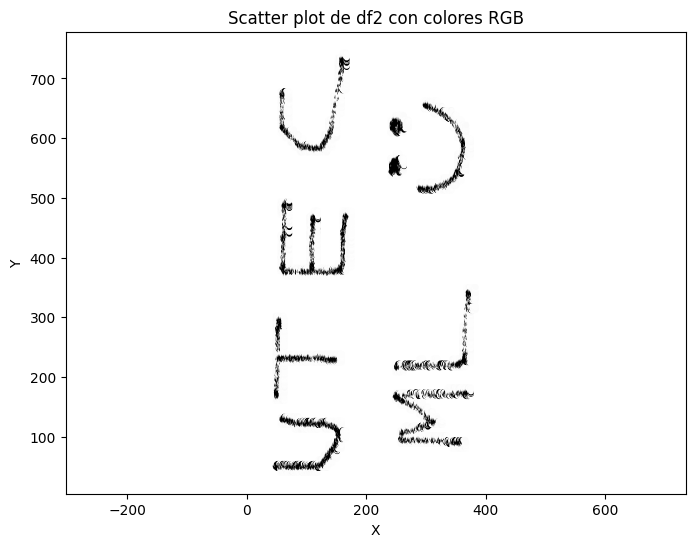

In [5]:
colors = df[['R','G','B']].values / 255.0
plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['Y'], c=colors, s=10, marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot de df2 con colores RGB')
plt.axis('equal')
plt.show()

# 1. DBSCAN:
- Input:  
  - Data : La Data  a ser agrupada
  - radio : Rádio de la hiperesfera
  - vecinos_min : Número mínimo de vecinos para ser condiderado cluster.
- Ouput: Vector con las etiquetas de cada elemento de la data.


link de la base de datos: [Aquí](https://drive.google.com/file/d/1KHVUORFr4TcI-4xUXLIlEBxxPS7d5zjQ/view?usp=sharing)

In [8]:
def DBSCAN(ds, radio, vecinos_min):

    # --- Distancia Euclídea
    def dist(p, q):

        return sum((pi - qi) ** 2 for pi, qi in zip(p, q)) ** 0.5
    # --- Índices de puntos dentro de radio
    def region_query(idx):
        p = ds[idx]
        return [j for j, q in enumerate(ds) if dist(p, q) <= radio]
    # --- Utilizamos busqueda en anchura para incluir puntos al cluster
    def expand_cluster(idx, neigh, cid):
        cluster_labels[idx] = cid                       # marca el punto inicial
        i = 0
        while i < len(neigh):                           # recorremos la lista
            j = neigh[i]
            if not visited[j]:                          # si aún no lo miramos
                visited[j] = True
                neigh_j = region_query(j)               # vecindario del vecino
                if len(neigh_j) >= vecinos_min:         # punto núcleo ⇒ expande
                    # añadimos nuevos vecinos que no estuvieran ya en la lista
                    for n in neigh_j:
                        if n not in neigh:
                            neigh.append(n)
            if cluster_labels[j] == -1:                 # era ruido → reclasifica
                cluster_labels[j] = cid
            elif cluster_labels[j] == 0:                # sin asignar → añádelo
                cluster_labels[j] = cid
            i += 1
    # --- inicialización ---------------------------------------
    n = len(ds)
    visited         = [False] * n      # marca si ya se procesó el punto
    cluster_labels  = [0]     * n      # 0 = sin asignar; –1 = ruido; >0 id
    cid = 0                            # id de clúster actual
    # --- bucle principal --------------------------------------
    for idx in range(n):
        if visited[idx]:
            continue
        visited[idx] = True
        vecinos = region_query(idx)

        if len(vecinos) < vecinos_min:     # no es núcleo → ruido
            cluster_labels[idx] = -1
        else:                              # nuevo clúster
            cid += 1
            expand_cluster(idx, vecinos, cid)

    return cluster_labels

# Image hidden information
The database contains hidden information. Some hints are:

- The first two columns in tha dataset "Misterio" indicate the row and column in an image.
- After applying the clustering algorithm and obtaining the labels, you will be able to plot the message where each letter should appear in a different color.

# Deciphering the information with DBSCAN
Read the dataset stored in the file "misterio.csv", and then run your **DBSCAN** algorithm. You should look for good parameters for radius and nearest neighbors to achieve better results.

[DBSCAN Library](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

In [ ]:
# DATAFRAME df ya cargado con columnas ['X','Y','R','G','B']
dataset = df.values.tolist()       # lo convertimos a lista de listas
labels  = DBSCAN(dataset, radio=31, vecinos_min=10)
 # Adjunta las etiquetas al DataFrame si lo deseas
df["cluster"] = labels
df.head()


,X,Y,R,G,B,cluster
0,48,48,253,253,253,1
1,48,49,254,254,254,1
2,48,51,0,0,0,2
3,48,52,252,252,252,1
4,48,160,254,254,254,1


# Show Result
Implement the function show_image that receives the dataset (coordinates i, j) and the labels, which will be the colors used to paint each cluster



In [11]:
def Show_Image(dataset, labels):
    # Pasamos a arrays de NumPy para indexar
    data   = np.asarray(dataset, dtype=float)
    labels = np.asarray(labels)
    unique_labels = sorted(set(labels))
    # Paleta de colores: tab20 tiene 20 tonos distintos; ciclo si hay >20 clústeres
    palette = list(islice(cycle(plt.cm.tab20.colors), len(unique_labels)))
    plt.figure(figsize=(6, 6))
    for lab, col in zip(unique_labels, palette):
        mask = labels == lab
        # Convención: -1 es ruido (lo pintamos de gris/negro tenue)
        if lab == -1:
            col   = "k"
            alpha = 0.3
            size  = 15
            lbl   = "Ruido"
        else:
            alpha = 0.8
            size  = 40
            lbl   = f"Cluster {lab}"

        plt.scatter(
            data[mask, 0],        # X
            data[mask, 1],        # Y
            c=[col],
            s=size,
            alpha=alpha,
            label=lbl,
            edgecolors="none",
        )

    plt.title("Resultados de DBSCAN incluyendo las 5 columnas")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis("equal")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

## Resultado de clusters incluyendo las 5 columnas

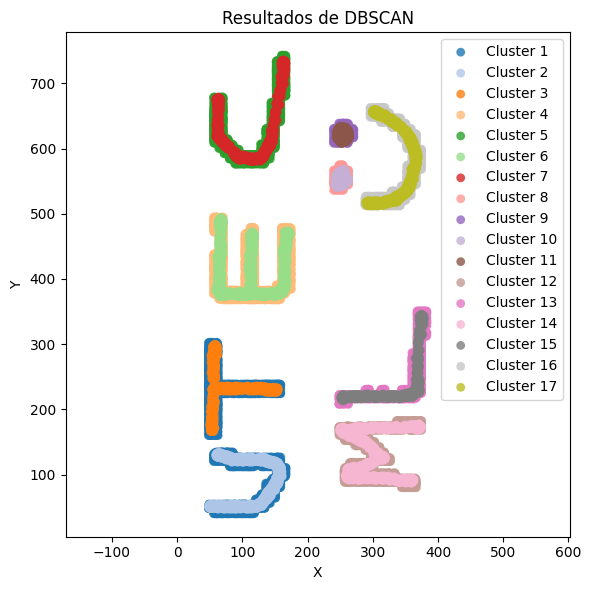

In [ ]:
# Asumiendo que `df` tiene las columnas X e Y y una lista `labels` con las etiquetas:
Show_Image(df[['X', 'Y']].values, labels)

## Resultado de clusters incluyendo las 2 columnas

In [9]:
df2 = df[['X', 'Y']]
# DATAFRAME df ya cargado con columnas ['X','Y','R','G','B']
dataset2 = df2.values.tolist()       # lo convertimos a lista de listas
labels2  = DBSCAN(dataset2, radio=21, vecinos_min=10)
 # Adjunta las etiquetas al DataFrame si lo deseas
df2["cluster"] = labels2
df2.head()

/tmp/ipython-input-9-452588012.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["cluster"] = labels2


,X,Y,cluster
0,48,48,1
1,48,49,1
2,48,51,1
3,48,52,1
4,48,160,2


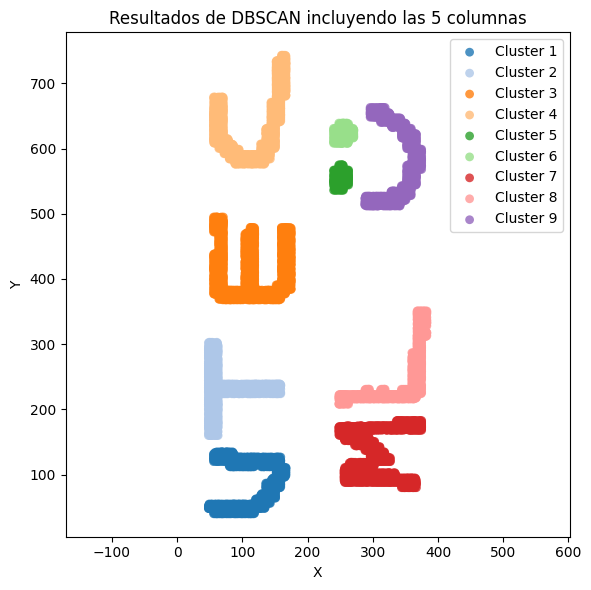

In [12]:
Show_Image(df2[['X', 'Y']].values, labels2)

#**One learns when they do things and, along the way, have fun in the process**🚀🚀

#Good Luck😊😊